In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Read data file
full_frame = pd.read_csv("global_electricity_statistics.csv")

# Ensure file fully parsed correctly
full_frame

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Trinidad and Tobago,distribution losses,Central & South America,0.244,0.21,0.152,0.326,0.36,0.407,0.337,...,0.239,0.234,0.245,0.248,0.253,0.274864,0.425807,0.424101,0.422757,0.422757
1606,Turks and Caicos Islands,distribution losses,Central & South America,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,...,0,0,0,0,0,0.014,0.0125,0.0125,0.0125,0.01277172
1607,U.S. Virgin Islands,distribution losses,Central & South America,0.05243,0.05537,0.05607,0.05761,0.05789,0.05922,0.06055,...,0.063,0.06,0.06,0.06,0.065,0.065,0.05,0.051,0.051,0.051
1608,Uruguay,distribution losses,Central & South America,0.55,0.426,0.627,0.662,0.78,0.702,0.911,...,1.292,1.282,1.253,1.49,1.608,1.694491,1.557257,1.322331,1.129273,1.129273


In [2]:
# Filtering to just usage statistics
pruned_frame = full_frame[full_frame['Features'] == 'net consumption']

pruned_frame

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
230,Algeria,net consumption,Africa,5.915,6.713,7.733,8.207,8.959,9.686,10.343,...,42.8675,45.2014,49.20572,53.45544,55.82304,60.28346,62.11403,66.646,63.69490277,68.66337919
231,Angola,net consumption,Africa,0.736,0.737,0.815,0.832,0.86,0.826,0.886,...,5.33508,7.05006,8.14866,8.23114,9.036511,9.468667,11.384079,13.658591,14.754764,14.56049071
232,Benin,net consumption,Africa,0.101,0.115,0.155,0.155,0.137,0.142,0.14,...,0.93312,0.93648,0.93366,1.08156,1.06104,1.125821,1.187964,0.9297,0.52408,0.523382994
233,Botswana,net consumption,Africa,0.41199,0.47686,0.53677,0.56362,0.59985,0.64708,0.74034,...,3.209,3.34768,3.60528,3.73004,3.61584,3.5528,3.651212,4.162138,3.22213,3.35303816
234,Burkina Faso,net consumption,Africa,0.09114,0.10044,0.10695,0.10881,0.10509,0.10695,0.11346,...,1.24784,1.35648,1.431962,1.69966,1.9974,2.06792,2.2648,2.651386,2.467133174,2.642688237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Trinidad and Tobago,net consumption,Central & South America,1.706,1.964,2.378,2.42,2.47,2.446,2.799,...,8.34532,8.70094,8.61292,8.7491,8.60216,8.490056,8.246993,8.213919,7.779031516,8.303561981
456,Turks and Caicos Islands,net consumption,Central & South America,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,...,0.197,0.196,0.21338,0.22466,0.235,0.212164,0.23008,0.232618,0.2435,0.25976828
457,U.S. Virgin Islands,net consumption,Central & South America,0.69657,0.73563,0.74493,0.76539,0.76911,0.78678,0.80445,...,0.715801,0.667248,0.640179,0.632274,0.62233,0.45824,0.56,0.568,0.5978,0.6415072
458,Uruguay,net consumption,Central & South America,2.745,3.119,2.888,2.999,3.144,3.145,3.282,...,9.86876,9.97776,10.33684,10.7926,11.39642,11.098889,11.768859,11.713604,11.780227,13.61377336


In [3]:
# Drop unused columns
pruned_frame = pruned_frame.drop(["Country", "Features", "Region"], axis='columns')

pruned_frame

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
230,5.915,6.713,7.733,8.207,8.959,9.686,10.343,11.119,11.954,12.19,...,42.8675,45.2014,49.20572,53.45544,55.82304,60.28346,62.11403,66.646,63.69490277,68.66337919
231,0.736,0.737,0.815,0.832,0.86,0.826,0.886,0.894,0.893,0.899,...,5.33508,7.05006,8.14866,8.23114,9.036511,9.468667,11.384079,13.658591,14.754764,14.56049071
232,0.101,0.115,0.155,0.155,0.137,0.142,0.14,0.135,0.131,0.15,...,0.93312,0.93648,0.93366,1.08156,1.06104,1.125821,1.187964,0.9297,0.52408,0.523382994
233,0.41199,0.47686,0.53677,0.56362,0.59985,0.64708,0.74034,0.85878,0.816,0.80621,...,3.209,3.34768,3.60528,3.73004,3.61584,3.5528,3.651212,4.162138,3.22213,3.35303816
234,0.09114,0.10044,0.10695,0.10881,0.10509,0.10695,0.11346,0.12369,0.13299,0.14229,...,1.24784,1.35648,1.431962,1.69966,1.9974,2.06792,2.2648,2.651386,2.467133174,2.642688237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1.706,1.964,2.378,2.42,2.47,2.446,2.799,2.949,2.981,2.883,...,8.34532,8.70094,8.61292,8.7491,8.60216,8.490056,8.246993,8.213919,7.779031516,8.303561981
456,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.0093,...,0.197,0.196,0.21338,0.22466,0.235,0.212164,0.23008,0.232618,0.2435,0.25976828
457,0.69657,0.73563,0.74493,0.76539,0.76911,0.78678,0.80445,0.84165,0.84816,0.83049,...,0.715801,0.667248,0.640179,0.632274,0.62233,0.45824,0.56,0.568,0.5978,0.6415072
458,2.745,3.119,2.888,2.999,3.144,3.145,3.282,3.464,3.722,3.601,...,9.86876,9.97776,10.33684,10.7926,11.39642,11.098889,11.768859,11.713604,11.780227,13.61377336


In [4]:
# Countries without a power consumption listed typically
# didn't have an energy grid at that time or were incredibly
# remote. We can fairly safely assume their consumption to
# be 0 in those cases, at least relative to a global scale.

# Indicator for "surveyed, no power grid"
pruned_frame.replace("--", 0, inplace=True)
pruned_frame.replace("ie", 0, inplace=True)

pruned_frame

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
230,5.915,6.713,7.733,8.207,8.959,9.686,10.343,11.119,11.954,12.19,...,42.8675,45.2014,49.20572,53.45544,55.82304,60.28346,62.11403,66.646,63.69490277,68.66337919
231,0.736,0.737,0.815,0.832,0.86,0.826,0.886,0.894,0.893,0.899,...,5.33508,7.05006,8.14866,8.23114,9.036511,9.468667,11.384079,13.658591,14.754764,14.56049071
232,0.101,0.115,0.155,0.155,0.137,0.142,0.14,0.135,0.131,0.15,...,0.93312,0.93648,0.93366,1.08156,1.06104,1.125821,1.187964,0.9297,0.52408,0.523382994
233,0.41199,0.47686,0.53677,0.56362,0.59985,0.64708,0.74034,0.85878,0.816,0.80621,...,3.209,3.34768,3.60528,3.73004,3.61584,3.5528,3.651212,4.162138,3.22213,3.35303816
234,0.09114,0.10044,0.10695,0.10881,0.10509,0.10695,0.11346,0.12369,0.13299,0.14229,...,1.24784,1.35648,1.431962,1.69966,1.9974,2.06792,2.2648,2.651386,2.467133174,2.642688237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1.706,1.964,2.378,2.42,2.47,2.446,2.799,2.949,2.981,2.883,...,8.34532,8.70094,8.61292,8.7491,8.60216,8.490056,8.246993,8.213919,7.779031516,8.303561981
456,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.0093,...,0.197,0.196,0.21338,0.22466,0.235,0.212164,0.23008,0.232618,0.2435,0.25976828
457,0.69657,0.73563,0.74493,0.76539,0.76911,0.78678,0.80445,0.84165,0.84816,0.83049,...,0.715801,0.667248,0.640179,0.632274,0.62233,0.45824,0.56,0.568,0.5978,0.6415072
458,2.745,3.119,2.888,2.999,3.144,3.145,3.282,3.464,3.722,3.601,...,9.86876,9.97776,10.33684,10.7926,11.39642,11.098889,11.768859,11.713604,11.780227,13.61377336


In [5]:
# Ensure that numeric data is actually processed as such
# (It currently seems to be getting string parsed because
# of the -- that appears in some rows even after correction.)
pruned_frame = pruned_frame.apply(pd.to_numeric, errors='coerce')

# Empty cell - missing data
pruned_frame = pruned_frame.fillna(0)

# Frame should match above but be forced into float64 columns
pruned_frame

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
230,5.91500,6.71300,7.73300,8.20700,8.95900,9.68600,10.34300,11.11900,11.95400,12.19000,...,42.867500,45.201400,49.205720,53.455440,55.823040,60.283460,62.114030,66.646000,63.694903,68.663379
231,0.73600,0.73700,0.81500,0.83200,0.86000,0.82600,0.88600,0.89400,0.89300,0.89900,...,5.335080,7.050060,8.148660,8.231140,9.036511,9.468667,11.384079,13.658591,14.754764,14.560491
232,0.10100,0.11500,0.15500,0.15500,0.13700,0.14200,0.14000,0.13500,0.13100,0.15000,...,0.933120,0.936480,0.933660,1.081560,1.061040,1.125821,1.187964,0.929700,0.524080,0.523383
233,0.41199,0.47686,0.53677,0.56362,0.59985,0.64708,0.74034,0.85878,0.81600,0.80621,...,3.209000,3.347680,3.605280,3.730040,3.615840,3.552800,3.651212,4.162138,3.222130,3.353038
234,0.09114,0.10044,0.10695,0.10881,0.10509,0.10695,0.11346,0.12369,0.13299,0.14229,...,1.247840,1.356480,1.431962,1.699660,1.997400,2.067920,2.264800,2.651386,2.467133,2.642688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1.70600,1.96400,2.37800,2.42000,2.47000,2.44600,2.79900,2.94900,2.98100,2.88300,...,8.345320,8.700940,8.612920,8.749100,8.602160,8.490056,8.246993,8.213919,7.779032,8.303562
456,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00465,0.00930,...,0.197000,0.196000,0.213380,0.224660,0.235000,0.212164,0.230080,0.232618,0.243500,0.259768
457,0.69657,0.73563,0.74493,0.76539,0.76911,0.78678,0.80445,0.84165,0.84816,0.83049,...,0.715801,0.667248,0.640179,0.632274,0.622330,0.458240,0.560000,0.568000,0.597800,0.641507
458,2.74500,3.11900,2.88800,2.99900,3.14400,3.14500,3.28200,3.46400,3.72200,3.60100,...,9.868760,9.977760,10.336840,10.792600,11.396420,11.098889,11.768859,11.713604,11.780227,13.613773


In [6]:
global_frame = pd.DataFrame(pruned_frame.sum(axis='rows'))

global_frame

,0
1980,7323.372305
1981,7410.429118
1982,7569.413689
1983,7872.425977
1984,8361.737720
1985,8662.099349
1986,8888.361763
1987,9278.659622
1988,9699.463799
1989,10131.936808


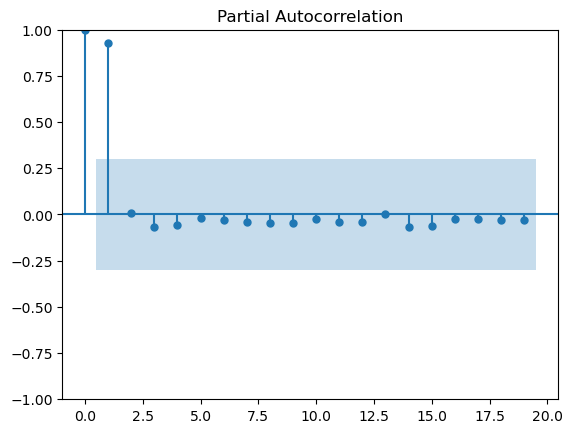

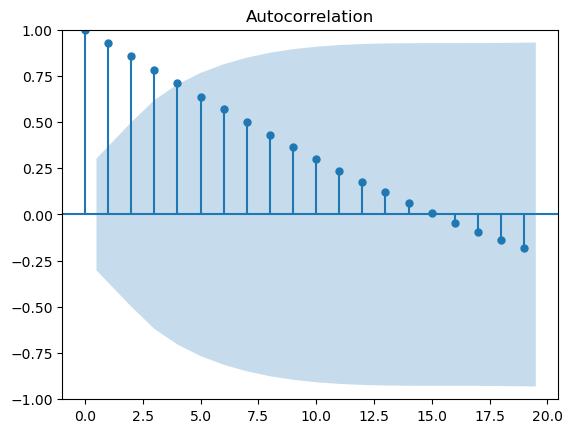

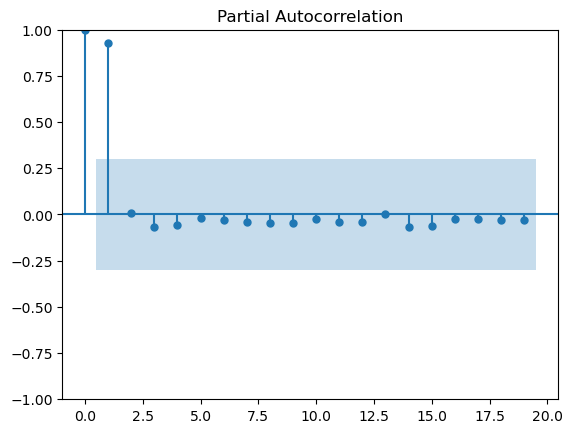

In [7]:
# Plot ACF and PACF
plot_acf(global_frame.dropna(), lags=(len(global_frame) / 2) - 2)
plot_pacf(global_frame.dropna(), lags=(len(global_frame) / 2) - 2)

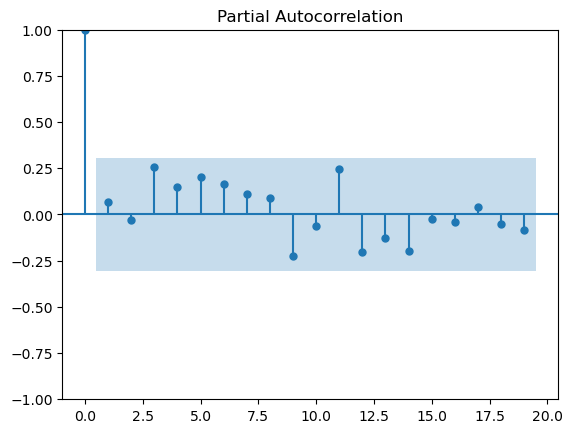

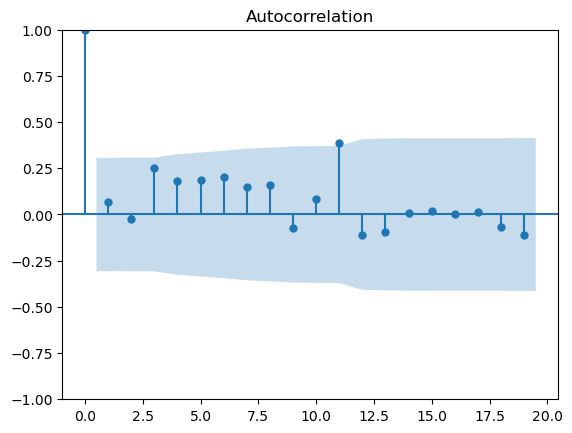

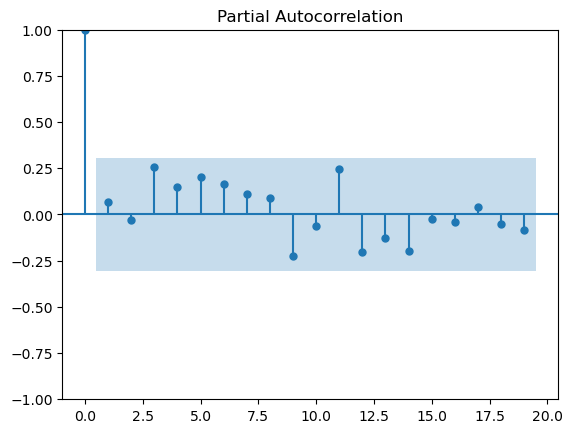

In [8]:
# 1 significant lag - p=1 found

# Plot ACF and PACF for first difference
plot_acf(global_frame.diff().dropna(), lags=(len(global_frame) / 2) - 2)
plot_pacf(global_frame.diff().dropna(), lags=(len(global_frame) / 2) - 2)

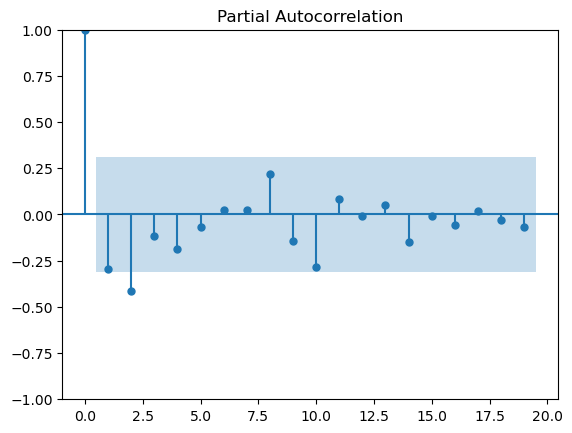

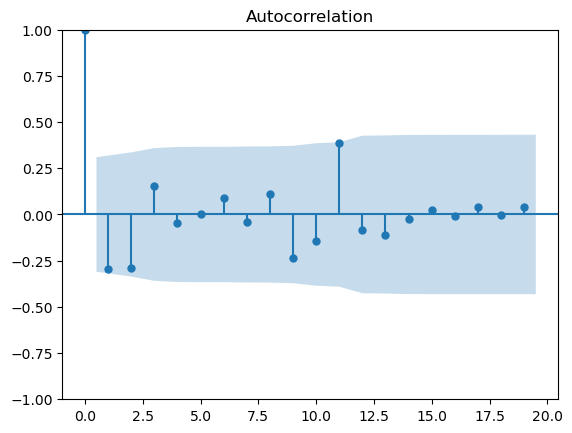

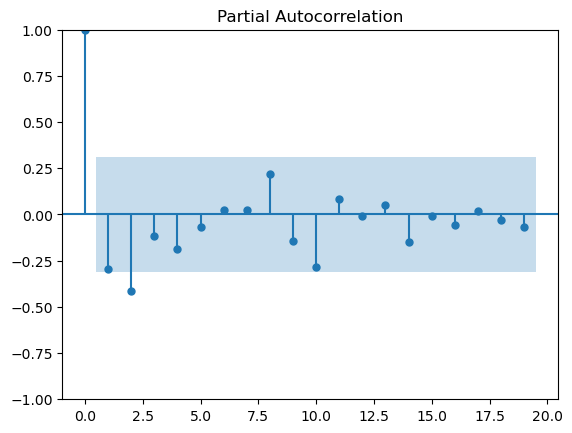

In [9]:
# Plot ACF and PACF for second difference
plot_acf(global_frame.diff().diff().dropna(), lags=(len(global_frame) / 2) - 2)
plot_pacf(global_frame.diff().diff().dropna(), lags=(len(global_frame) / 2) - 2)

In [10]:
global_frame.index = pd.to_datetime(global_frame.index.astype(str) + '-01-01')
global_frame.index.freq = 'AS'  # Set the frequency to Annual Start

# Step 2: Set the datetime index
global_frame.set_index(global_frame.index, inplace=True)

# PACF switches over on second difference. d= 1
# No significant lags in any ACF. q=0
model = ARIMA(global_frame, order=(1, 1, 0))
results = model.fit()

# Obtain the next two numeric predictions and associated standard errors
prediction_2022 = results.forecast(steps=1)
prediction_2023 = results.forecast(steps=2)

# Print or use the forecasted values
print(prediction_2022)
print(prediction_2023)

2022-01-01    26285.425472
Freq: AS-JAN, dtype: float64
2022-01-01    26285.425472
2023-01-01    26930.616455
Freq: AS-JAN, Name: predicted_mean, dtype: float64
